In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import sklearn as sk 

In [2]:
df=pd.read_csv('/Users/chrisgilibert/neuefische/kickstar/data/data2/final_frame.csv')
df.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,deadline,disable_communication,goal,id,is_starrable,...,state,state_changed_at,convert_goal,subcategy_id,subcategory,category,category_id,month_project,weekday,duration
0,47,A colorful Dia de los Muertos themed oracle de...,1950,US,2017-08-02 14:28:13,2017-09-09 17:00:59,False,1000.0,928751314,False,...,successful,2017-09-09 17:00:59,1000.0000,273,Playing Cards,games,12,8,3,30
1,271,"Electra's long awaited, eclectic Debut Pop/Roc...",22404,US,2012-09-30 06:45:33,2013-06-12 05:03:15,False,15000.0,928014092,False,...,successful,2013-06-12 05:03:15,15000.0000,43,Rock,music,14,5,0,30
2,3,The Mist of Tribunal is a turn-based card game...,165,GB,2017-01-07 09:11:11,2017-03-13 17:22:56,False,10000.0,596091328,False,...,failed,2017-03-13 17:22:56,12160.6569,273,Playing Cards,games,12,1,3,59
3,3,"Livng with a brain impairment, what its like t...",2820,US,2012-12-06 18:04:31,2013-01-09 20:32:07,False,2800.0,998516049,False,...,successful,2013-01-09 20:32:07,2800.0000,48,Nonfiction,publishing,18,12,0,30
4,35,Annapolis Chamber Players is a non-for profit ...,3725,US,2014-10-24 17:35:50,2015-05-02 02:25:46,False,3500.0,1224600291,False,...,successful,2015-05-02 02:25:46,3500.0000,36,Classical Music,music,14,4,3,30


In [3]:
features = df.drop(["state", 'is_starrable','disable_communication', 'spotlight'], axis=1) #create features and target
target = df["state"]


In [4]:
features.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'deadline', 'goal', 'id', 'launched_at', 'name',
       'staff_pick', 'state_changed_at', 'convert_goal', 'subcategy_id',
       'subcategory', 'category', 'category_id', 'month_project', 'weekday',
       'duration'],
      dtype='object')

In [5]:
features_raw= features.drop(["blurb", 'created_at',	'deadline' ,  'id',  'launched_at', 'name','state_changed_at', 'subcategory', 'category', 'backers_count', 'converted_pledged_amount', 'goal'], axis=1) #get rid of unnecesary data 

In [6]:
features_raw= pd.get_dummies(features_raw, drop_first=True)
features_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   staff_pick     168979 non-null  bool   
 1   convert_goal   168979 non-null  float64
 2   subcategy_id   168979 non-null  int64  
 3   category_id    168979 non-null  int64  
 4   month_project  168979 non-null  int64  
 5   weekday        168979 non-null  int64  
 6   duration       168979 non-null  int64  
 7   country_AU     168979 non-null  uint8  
 8   country_BE     168979 non-null  uint8  
 9   country_CA     168979 non-null  uint8  
 10  country_CH     168979 non-null  uint8  
 11  country_DE     168979 non-null  uint8  
 12  country_DK     168979 non-null  uint8  
 13  country_ES     168979 non-null  uint8  
 14  country_FR     168979 non-null  uint8  
 15  country_GB     168979 non-null  uint8  
 16  country_HK     168979 non-null  uint8  
 17  country_IE     168979 non-nul

In [7]:
features_raw
pd.set_option("display.max_columns", None)
features_raw

,staff_pick,convert_goal,subcategy_id,category_id,month_project,weekday,duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,False,1000.0000,273,12,8,3,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,False,15000.0000,43,14,5,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,False,12160.6569,273,12,1,3,59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,False,2800.0000,48,18,12,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,False,3500.0000,36,14,4,3,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,False,3883.0000,38,14,8,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
168975,False,5466.5002,38,14,5,6,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
168976,False,2500.0000,52,16,8,1,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
168977,False,5500.0000,295,11,3,5,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
target=target.replace('failed', 0).replace('successful',1)
target #target to numerical values 


0         1
1         1
2         0
3         1
4         1
         ..
168974    1
168975    1
168976    1
168977    1
168978    1
Name: state, Length: 168979, dtype: int64

In [9]:
df2= pd.concat([target,features_raw], axis=1)
df2.head()

,state,staff_pick,convert_goal,subcategy_id,category_id,month_project,weekday,duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1,False,1000.0000,273,12,8,3,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,False,15000.0000,43,14,5,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,False,12160.6569,273,12,1,3,59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,False,2800.0000,48,18,12,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,False,3500.0000,36,14,4,3,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
df2.corr() #review correlation between target and features 

,state,staff_pick,convert_goal,subcategy_id,category_id,month_project,weekday,duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
state,1.000000,0.258897,-0.032397,-0.350918,-0.047188,-0.013544,-0.022763,-0.153926,-0.027667,-0.017671,-0.018304,-0.016422,-0.036460,-0.003094,-0.029131,-0.015088,0.023010,0.017531,-0.010399,-0.058841,0.004319,0.000659,-0.029494,-0.032550,-0.010265,-0.005322,-0.010184,0.000213,0.056901
staff_pick,0.258897,1.000000,-0.006526,-0.063750,-0.015293,0.007927,-0.045820,-0.023980,-0.019685,-0.006401,-0.014376,-0.009831,0.001302,-0.003862,-0.017781,-0.000257,0.002248,-0.011152,-0.006988,-0.022993,0.014066,-0.005007,0.014796,-0.004213,-0.003612,-0.006690,-0.008584,-0.011477,0.026387
convert_goal,-0.032397,-0.006526,1.000000,0.017864,-0.002651,0.003402,0.000393,0.025282,0.004295,0.000472,-0.001003,0.020504,0.003996,-0.001356,0.001009,0.000348,-0.003343,-0.001322,-0.000766,0.002372,-0.000735,-0.000264,-0.002534,0.004182,-0.000997,-0.001687,-0.000298,-0.001247,-0.002349
subcategy_id,-0.350918,-0.063750,0.017864,1.000000,0.203236,0.020987,-0.001351,0.046789,0.031974,0.005675,0.026458,0.009651,0.026596,0.006821,0.013014,0.013236,0.012920,0.008000,0.008280,0.036648,-0.003982,0.000001,0.017191,0.023155,0.009047,0.004696,0.012024,0.007613,-0.072379
category_id,-0.047188,-0.015293,-0.002651,0.203236,1.000000,0.012871,-0.003201,0.034921,0.009373,0.001715,-0.004919,0.004660,0.015075,0.003280,0.002606,0.008220,0.001657,0.000518,0.008585,0.008355,0.000848,0.003340,0.007660,0.004551,0.005645,0.006595,0.005586,0.000273,-0.019191
month_project,-0.013544,0.007927,0.003402,0.020987,0.012871,1.000000,-0.011486,0.018764,0.009887,0.004072,0.007844,0.004574,0.012196,0.000598,0.006108,0.011062,-0.013266,0.009847,-0.001819,0.009475,0.000467,0.004615,0.004591,0.011993,0.002509,0.011036,0.004505,0.012056,-0.018438
weekday,-0.022763,-0.045820,0.000393,-0.001351,-0.003201,-0.011486,1.000000,0.013229,0.012196,0.002634,-0.002942,-0.001925,0.007241,0.001679,-0.001321,-0.006255,0.012301,-0.005218,-0.004067,-0.000810,0.008944,-0.001928,0.001698,-0.001325,-0.003457,0.003181,-0.002179,0.000306,-0.011021
duration,-0.153926,-0.023980,0.025282,0.046789,0.034921,0.018764,0.013229,1.000000,0.001744,0.011113,0.009734,0.009126,0.012292,-0.004579,0.011747,0.024306,-0.041977,0.005374,0.002663,0.038840,-0.000962,0.001851,0.034737,0.003817,0.005807,-0.010358,0.002882,-0.000175,-0.008160
country_AU,-0.027667,-0.019685,0.004295,0.031974,0.009373,0.009887,0.012196,0.001744,1.000000,-0.007707,-0.033177,-0.008394,-0.019045,-0.009907,-0.014169,-0.016688,-0.052421,-0.009522,-0.008253,-0.015846,-0.005577,-0.002432,-0.015236,-0.014184,-0.007396,-0.010176,-0.012184,-0.008040,-0.247461
country_BE,-0.017671,-0.006401,0.000472,0.005675,0.001715,0.004072,0.002634,0.011113,-0.007707,1.000000,-0.011008,-0.002785,-0.006319,-0.003287,-0.004701,-0.005537,-0.017393,-0.003159,-0.002738,-0.005257,-0.001851,-0.000807,-0.005055,-0.004706,-0.002454,-0.003376,-0.004042,-0.002668,-0.082106


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( features_raw, target, stratify=target, random_state=42, test_size=0.2)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))  #data split train and test 

Training set has 135183 samples.
Testing set has 33796 samples.


## Decision Tree Model

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=42)   #creation of first model decision tree 
model1= model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1).round()
print("Predicted values:\n", y_pred1 ) 
print("Confusion Matrix: \n", 
        cm1) 
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print(f'Decision tree has {model1.tree_.node_count} nodes with maximum depth {model1.tree_.max_depth}.')
print("Report : \n", 
classification_report(y_test, y_pred1))


Predicted values:
 [1 1 0 ... 1 1 1]
Confusion Matrix: 
 [[10359  4481]
 [ 4553 14403]]
Accuracy: 73.27%
Decision tree has 61331 nodes with maximum depth 50.
Report : 
               precision    recall  f1-score   support

           0       0.69      0.70      0.70     14840
           1       0.76      0.76      0.76     18956

    accuracy                           0.73     33796
   macro avg       0.73      0.73      0.73     33796
weighted avg       0.73      0.73      0.73     33796



In [13]:

from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(model1, 'tree.dot', rounded = True, 
                feature_names = X_train.columns, filled = True)

In [14]:
from subprocess import call
# Convert to png
# make sure you have installed graphviz in your environment 
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

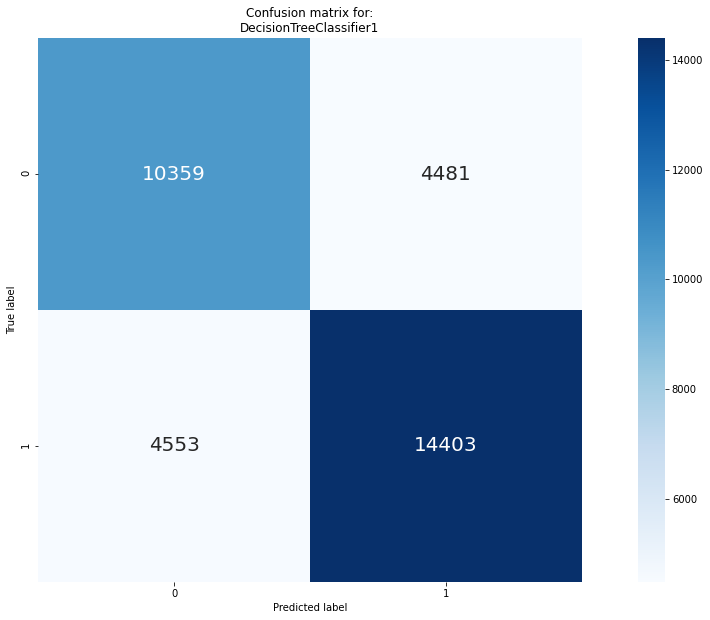

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(cm1, annot=True, annot_kws={"size":20}, 
            cmap='Blues', square=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}1'.format(model1.__class__.__name__));

    # view with a heatmap
    

In [16]:
train_probs1 = model1.predict_proba(X_train)[:, 1]
train_predictions1 = model1.predict(X_train)

probs1 = model1.predict_proba(X_test)[:, 1]

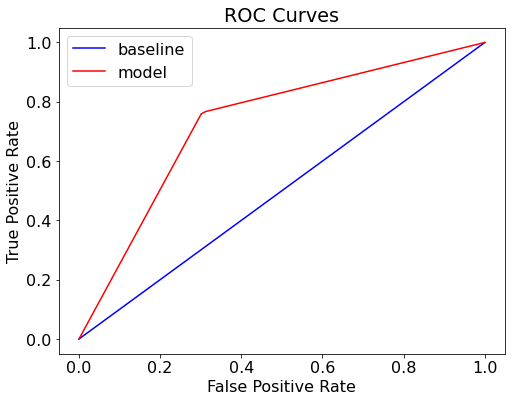

In [17]:
    from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs1)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [18]:
model3 = DecisionTreeClassifier(random_state=42, max_leaf_nodes= 534)  #improved model decision tree 
model3= model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
cm3 = confusion_matrix(y_test, y_pred3).round()
print("Predicted values:\n", y_pred3 ) 
print("Confusion Matrix: \n", 
        cm3) 
print("Accuracy: %.4f%%" % (accuracy3 * 100.0))
print(f'Decision tree has {model3.tree_.node_count} nodes with maximum depth {model3.tree_.max_depth}.')
print("Report : \n", 
classification_report(y_test, y_pred3))


Predicted values:
 [1 1 0 ... 1 1 1]
Confusion Matrix: 
 [[11720  3120]
 [ 3889 15067]]
Accuracy: 79.2609%
Decision tree has 1067 nodes with maximum depth 19.
Report : 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     14840
           1       0.83      0.79      0.81     18956

    accuracy                           0.79     33796
   macro avg       0.79      0.79      0.79     33796
weighted avg       0.79      0.79      0.79     33796



In [19]:

# Export as dot
export_graphviz(model3, 'tree3.dot', rounded = True, 
                feature_names = X_train.columns, filled = True)
call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=400']); # Convert to png

In [20]:
train_probs3 = model3.predict_proba(X_train)[:, 1]
train_predictions3 = model3.predict(X_train)

probs3 = model3.predict_proba(X_test)[:, 1]

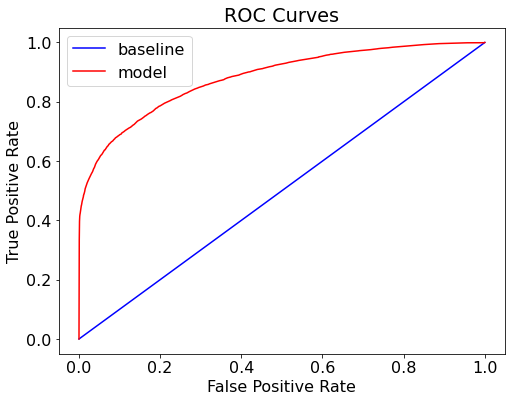

In [21]:
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs3)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

## Random Forest Model 

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=42)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [23]:
rs.best_params_

{'n_estimators': 196,
 'min_samples_split': 10,
 'max_leaf_nodes': 49,
 'max_features': 0.7,
 'max_depth': 17,
 'bootstrap': True}

In [24]:
best_model = rs.best_estimator_

In [25]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [26]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 97
Average maximum depth 12


In [27]:

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.76 Train: 0.77
Precision Baseline: 0.56 Test: 0.83 Train: 0.83
Roc Baseline: 0.5 Test: 0.87 Train: 0.87


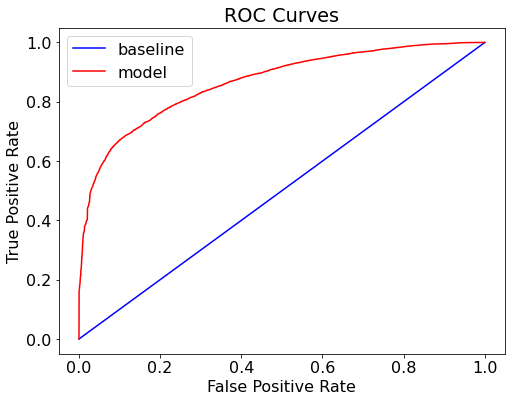

In [28]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [29]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names= X_train.columns , max_depth = 17, 
                class_names = ['reach goal', 'no goal reached'], filled = True)
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=400']); # Convert to png

In [30]:
y_pred4 = estimator.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
cm4 = confusion_matrix(y_test, y_pred4).round()
print("Predicted values:\n", y_pred4 ) 
print("Confusion Matrix: \n", 
        cm4) 
print("Accuracy: %.4f%%" % (accuracy4 * 100.0))
print(f'Decision tree has {estimator.tree_.node_count} nodes with maximum depth {estimator.tree_.max_depth}.')
print("Report : \n", 
classification_report(y_test, y_pred4))


Predicted values:
 [1. 1. 0. ... 1. 1. 1.]
Confusion Matrix: 
 [[12224  2616]
 [ 5385 13571]]
Accuracy: 76.3256%
Decision tree has 97 nodes with maximum depth 16.
Report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75     14840
           1       0.84      0.72      0.77     18956

    accuracy                           0.76     33796
   macro avg       0.77      0.77      0.76     33796
weighted avg       0.78      0.76      0.76     33796



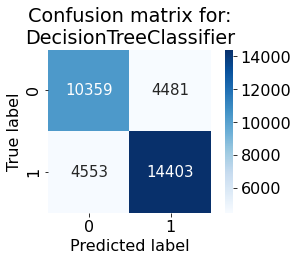

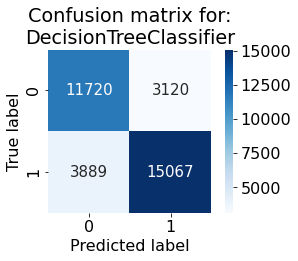

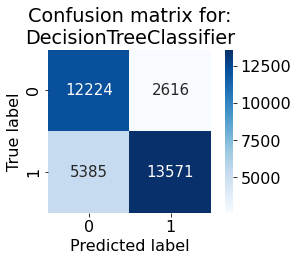

In [31]:
cms=[cm1,cm3,cm4]
for cm in cms:
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, annot_kws={"size":15}, 
                cmap='Blues', square=True, fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model1.__class__.__name__) );

In [32]:
df
# df[ 'subcategory_id'].unique()
subcat = df[['category_id' , 'subcategy_id', 'subcategory']]
subcat=subcat.drop_duplicates()
subcat=subcat.sort_values(by='subcategy_id', ignore_index=True)
pd.options.display.max_rows = 170
subcat

,category_id,subcategy_id,subcategory
0,1,1,Art
1,3,3,Comics
2,6,6,Dance
3,7,7,Design
4,9,9,Fashion
5,10,10,Food
6,11,11,Film & Video
7,12,12,Games
8,13,13,Journalism
9,14,14,Music


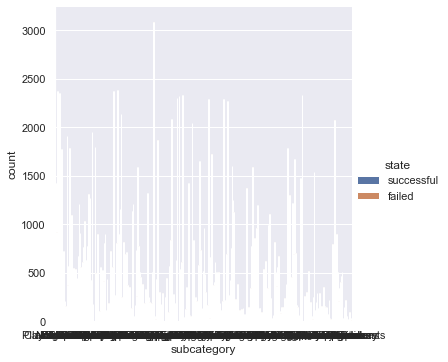

In [33]:
sns.set(rc={'figure.figsize':(20,20)})

g = sns.catplot( x="subcategory", hue="state", kind="count", data=df)

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model3, random_state=1).fit(X_test, y_test)
pd.options.display.max_rows = 100
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#sns.barplot(perm, x=feature )
#perm = PermutationImportance(model3, random_state=1).fit(X_test, y_test)

Weight,Feature
0.1865 ± 0.0033,subcategy_id
0.0581 ± 0.0013,staff_pick
0.0551 ± 0.0013,category_id
0.0484 ± 0.0033,convert_goal
0.0093 ± 0.0012,duration
0.0081 ± 0.0012,country_US
0.0021 ± 0.0005,country_GB
0.0007 ± 0.0012,month_project
0.0005 ± 0.0004,weekday
0.0002 ± 0.0001,country_CA


In [37]:
#what is the status of the projects
gb_subcat= df.loc[df['state']== 'successful'].groupby('subcategory')
gb_subcat1=gb_subcat.count().sort_values(by='blurb',ascending=False)
gb_subcat1.head(50)

,backers_count,blurb,converted_pledged_amount,country,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,name,spotlight,staff_pick,state,state_changed_at,convert_goal,subcategy_id,category,category_id,month_project,weekday,duration
subcategory,,,,,,,,,,,,,,,,,,,,,,,
Indie Rock,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381,2381
Rock,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378
Country & Folk,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374
Nonfiction,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
Fiction,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333
Shorts,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330
Documentary,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323
Comic Books,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305
Children's Books,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [38]:
gb_subcat1.tail(50)

,backers_count,blurb,converted_pledged_amount,country,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,name,spotlight,staff_pick,state,state_changed_at,convert_goal,subcategy_id,category,category_id,month_project,weekday,duration
subcategory,,,,,,,,,,,,,,,,,,,,,,,
Gaming Hardware,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
Kids,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
Audio,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
Action,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
Blues,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
Fantasy,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
Places,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Space Exploration,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
R&B,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134


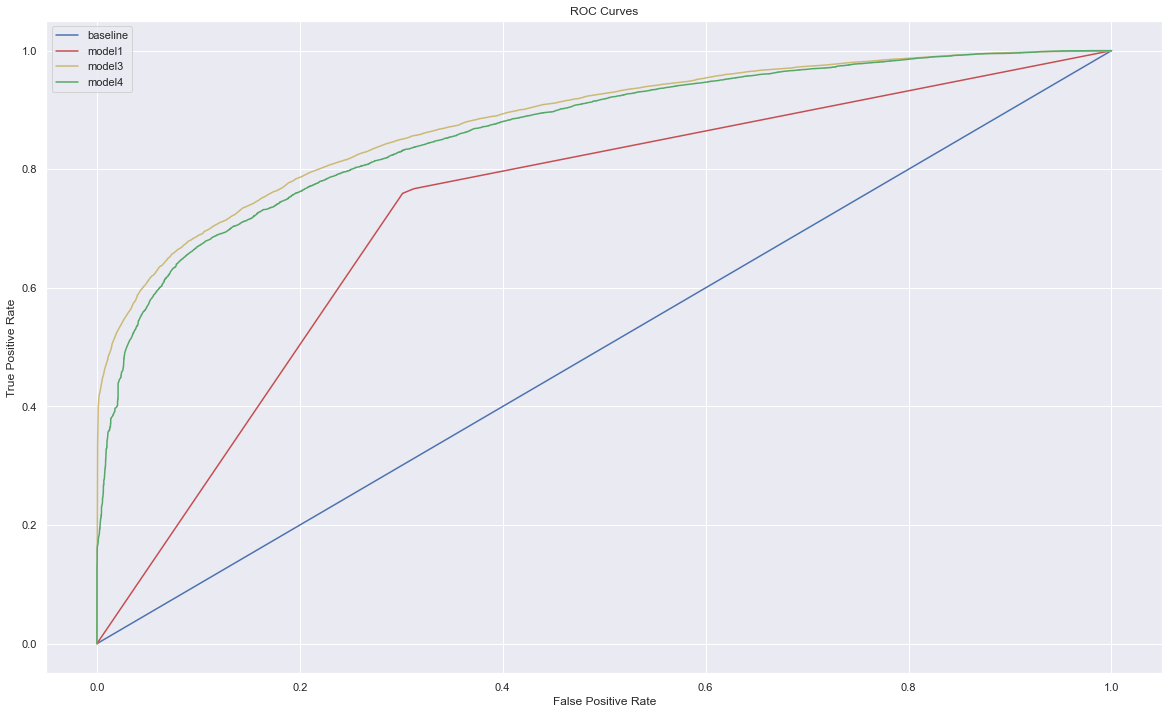

In [39]:
 # Calculate false positive rates and true positive rates
base_fpr1, base_tpr1, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
model_fpr1, model_tpr1, _ = roc_curve(y_test, probs1)
base_fpr3, base_tpr3, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
model_fpr3, model_tpr3, _ = roc_curve(y_test, probs3)
base_fpr4, base_tpr4, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
model_fpr4, model_tpr4, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize = (20, 12))
plt.rcParams['font.size'] = 50
    
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr1, model_tpr1, 'r', label = 'model1')
plt.plot(model_fpr3, model_tpr3, 'y', label = 'model3')
plt.plot(model_fpr4, model_tpr4, 'g', label = 'model4')
plt.legend();
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [40]:
df

,backers_count,blurb,converted_pledged_amount,country,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,name,spotlight,staff_pick,state,state_changed_at,convert_goal,subcategy_id,subcategory,category,category_id,month_project,weekday,duration
0,47,A colorful Dia de los Muertos themed oracle de...,1950,US,2017-08-02 14:28:13,2017-09-09 17:00:59,False,1000.0,928751314,False,2017-08-10 17:00:59,The Ofrenda Oracle Deck,True,False,successful,2017-09-09 17:00:59,1000.0000,273,Playing Cards,games,12,8,3,30
1,271,"Electra's long awaited, eclectic Debut Pop/Roc...",22404,US,2012-09-30 06:45:33,2013-06-12 05:03:15,False,15000.0,928014092,False,2013-05-13 05:03:15,"Record Electra's Debut Album (Pop, Rock, Class...",True,False,successful,2013-06-12 05:03:15,15000.0000,43,Rock,music,14,5,0,30
2,3,The Mist of Tribunal is a turn-based card game...,165,GB,2017-01-07 09:11:11,2017-03-13 17:22:56,False,10000.0,596091328,False,2017-01-12 18:22:56,The Mist of Tribunal - A Card Game,False,False,failed,2017-03-13 17:22:56,12160.6569,273,Playing Cards,games,12,1,3,59
3,3,"Livng with a brain impairment, what its like t...",2820,US,2012-12-06 18:04:31,2013-01-09 20:32:07,False,2800.0,998516049,False,2012-12-10 20:32:07,Help change the face of Brain Impairment,True,False,successful,2013-01-09 20:32:07,2800.0000,48,Nonfiction,publishing,18,12,0,30
4,35,Annapolis Chamber Players is a non-for profit ...,3725,US,2014-10-24 17:35:50,2015-05-02 02:25:46,False,3500.0,1224600291,False,2015-04-02 02:25:46,Annapolis Chamber Music Project,True,False,successful,2015-05-02 02:25:46,3500.0000,36,Classical Music,music,14,4,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,108,*PRE-SALES* for Our first Full-Length Album- c...,4078,US,2014-07-17 19:33:05,2014-10-01 23:44:00,False,3883.0,672518235,False,2014-08-04 17:29:16,"It Springs to Life...""Pellucidity"" YAIMA's Fir...",True,False,successful,2014-10-01 23:44:00,3883.0000,38,Electronic Music,music,14,8,0,58
168975,72,"Soul, hip-hop and sexy falsettos with an opera...",5710,NL,2017-04-24 13:46:12,2017-06-19 22:00:00,False,5000.0,4607750,False,2017-05-14 17:21:54,ARIA LESTER Debut EP,True,False,successful,2017-06-19 22:00:00,5466.5002,38,Electronic Music,music,14,5,6,36
168976,62,What started as a homemade gift has turned int...,2681,US,2012-07-03 19:29:55,2012-09-17 03:59:00,False,2500.0,67097337,False,2012-08-14 20:36:30,FlashPals: Cuddly USB Drives Save More Than Yo...,True,False,successful,2012-09-17 03:59:01,2500.0000,52,Hardware,technology,16,8,1,33
168977,76,Seattle Transmedia & Independent Film Festival...,5692,US,2015-03-02 00:42:37,2015-04-20 13:26:15,False,5500.0,1031742546,False,2015-03-21 13:26:15,Transmedia Gallery Space STIFF 2015,True,False,successful,2015-04-20 13:26:19,5500.0000,295,Festivals,film & video,11,3,5,30


In [41]:
df1= df.drop(["blurb", 'created_at',	'deadline' ,  'id',  'launched_at', 'name','state_changed_at', 'category', 'converted_pledged_amount', 'goal','disable_communication', 'is_starrable','spotlight','month_project'],axis=1)
df1

,backers_count,country,staff_pick,state,convert_goal,subcategy_id,subcategory,category_id,weekday,duration
0,47,US,False,successful,1000.0000,273,Playing Cards,12,3,30
1,271,US,False,successful,15000.0000,43,Rock,14,0,30
2,3,GB,False,failed,12160.6569,273,Playing Cards,12,3,59
3,3,US,False,successful,2800.0000,48,Nonfiction,18,0,30
4,35,US,False,successful,3500.0000,36,Classical Music,14,3,30
...,...,...,...,...,...,...,...,...,...,...
168974,108,US,False,successful,3883.0000,38,Electronic Music,14,0,58
168975,72,NL,False,successful,5466.5002,38,Electronic Music,14,6,36
168976,62,US,False,successful,2500.0000,52,Hardware,16,1,33
168977,76,US,False,successful,5500.0000,295,Festivals,11,5,30


In [42]:
gb_category0=pd.DataFrame({'count0' : df1.loc[df['state']=='failed'].groupby('subcategy_id').size()}).reset_index()
gb_category1=pd.DataFrame({'count1' : df1.loc[df['state']=='successful'].groupby('subcategy_id').size()}).reset_index()
gb_category1

,subcategy_id,count1
0,1,836
1,3,353
2,6,1474
3,7,191
4,9,173
...,...,...
164,362,81
165,386,19
166,387,50
167,388,106


In [43]:
gb_category0

,subcategy_id,count0
0,13,210
1,20,615
2,21,959
3,22,36
4,23,1127
...,...,...
138,362,152
139,386,18
140,387,72
141,388,62


In [44]:
df2=pd.concat([gb_category1.set_index('subcategy_id'),gb_category0.set_index('subcategy_id')], axis=1, join='outer').reset_index()

In [74]:
df2=df2.fillna(value=0)
df2['successrate']= df2['count1'] /(df2['count0']+df2['count1'])

df2=df2.sort_values(by='successrate',ascending=False, ignore_index=True)
df2.head(40)

,subcategy_id,count1,count0,successrate
0,1,836,0.0,1.000000
1,9,173,0.0,1.000000
2,37,2374,0.0,1.000000
3,46,2295,0.0,1.000000
4,35,2269,0.0,1.000000
5,34,2049,0.0,1.000000
6,47,2333,0.0,1.000000
7,32,2330,0.0,1.000000
8,30,2323,0.0,1.000000
9,28,2080,0.0,1.000000


In [79]:
df3=pd.concat([df2.set_index('subcategy_id'),subcat.set_index('subcategy_id')], axis=1 , join='inner', sort=True)
df3=df3.sort_values(by='successrate')#,ascending=False)
df3.to_csv('successbycategory.csv')
df3.head(40)

,count1,count0,successrate,category_id,subcategory
subcategy_id,,,,,
342,288,2088.0,0.121212,16,Web
272,308,2073.0,0.129357,12,Mobile Games
360,56,356.0,0.135922,13,Video
311,246,1538.0,0.137892,10,Food Trucks
343,68,384.0,0.150442,26,Candles
265,45,216.0,0.172414,9,Couture
51,422,1947.0,0.178134,16,Software
345,211,962.0,0.179881,26,DIY
361,222,1001.0,0.181521,13,Web


In [81]:
df4=df3.subcategory.reset_index()#.to_string()
df4=df4.subcategory


In [82]:
', '.join(df4.tolist())

"Web, Mobile Games, Video, Food Trucks, Candles, Couture, Software, DIY, Web, Television, Farmer's Markets, Events, Apps, Action, Photo, Places, Ready-to-wear, Nature, Flight, Bacon, Live Games, Embroidery, Interactive Design, Family, Childrenswear, Farms, Restaurants, Crochet, Academic, Community Gardens, Translations, People, Printing, Young Adult, Quilts, Architecture, Hip-Hop, Animals, R&B, Print, Woodworking, Glass, Latin, Fabrication Tools, Pet Fashion, Experimental, Cookbooks, Drinks, Jewelry, Video Art, Audio, Animation, Spaces, Thrillers, Workshops, Romance, Makerspaces, Digital Art, Weaving, Vegan, Small Batch, Movie Theaters, Textiles, Electronic Music, Fantasy, Civic Design, Horror, Spaces, Footwear, Gaming Hardware, Events, Music Videos, Conceptual Art, Wearables, Poetry, Stationery, Comedy, Science Fiction, Space Exploration, Fine Art, Sculpture, Puzzles, Drama, 3D Printing, Graphic Design, Comedy, Periodicals, Metal, Robots, Mixed Media, Calendars, Faith, Photobooks, Per

In [171]:
df2.successrate.sum()/133



0.6417961341670176

In [176]:
df_dur0= df1.loc[df['state']=='failed', 'duration']
df_dur1= df1.loc[df['state']=='successful','duration']

df_dur1


0         30
1         30
3         30
4         30
5         30
          ..
168974    58
168975    36
168976    33
168977    30
168978    31
Name: duration, Length: 94779, dtype: int64

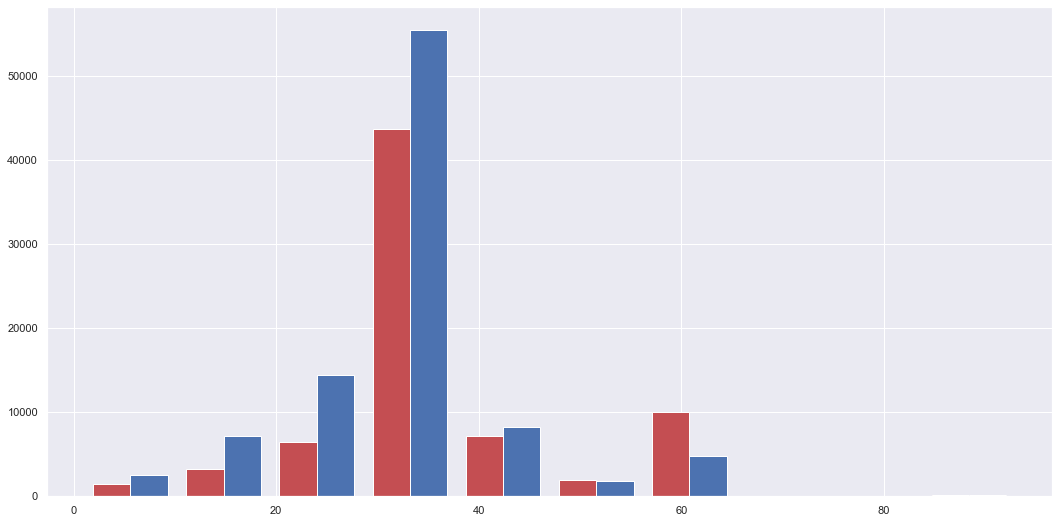

In [182]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))
x = df_dur0
y = df_dur1
plt.hist([x, y],color=['r','b'],)
plt.show()